In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('iris.csv', index_col='Species')
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


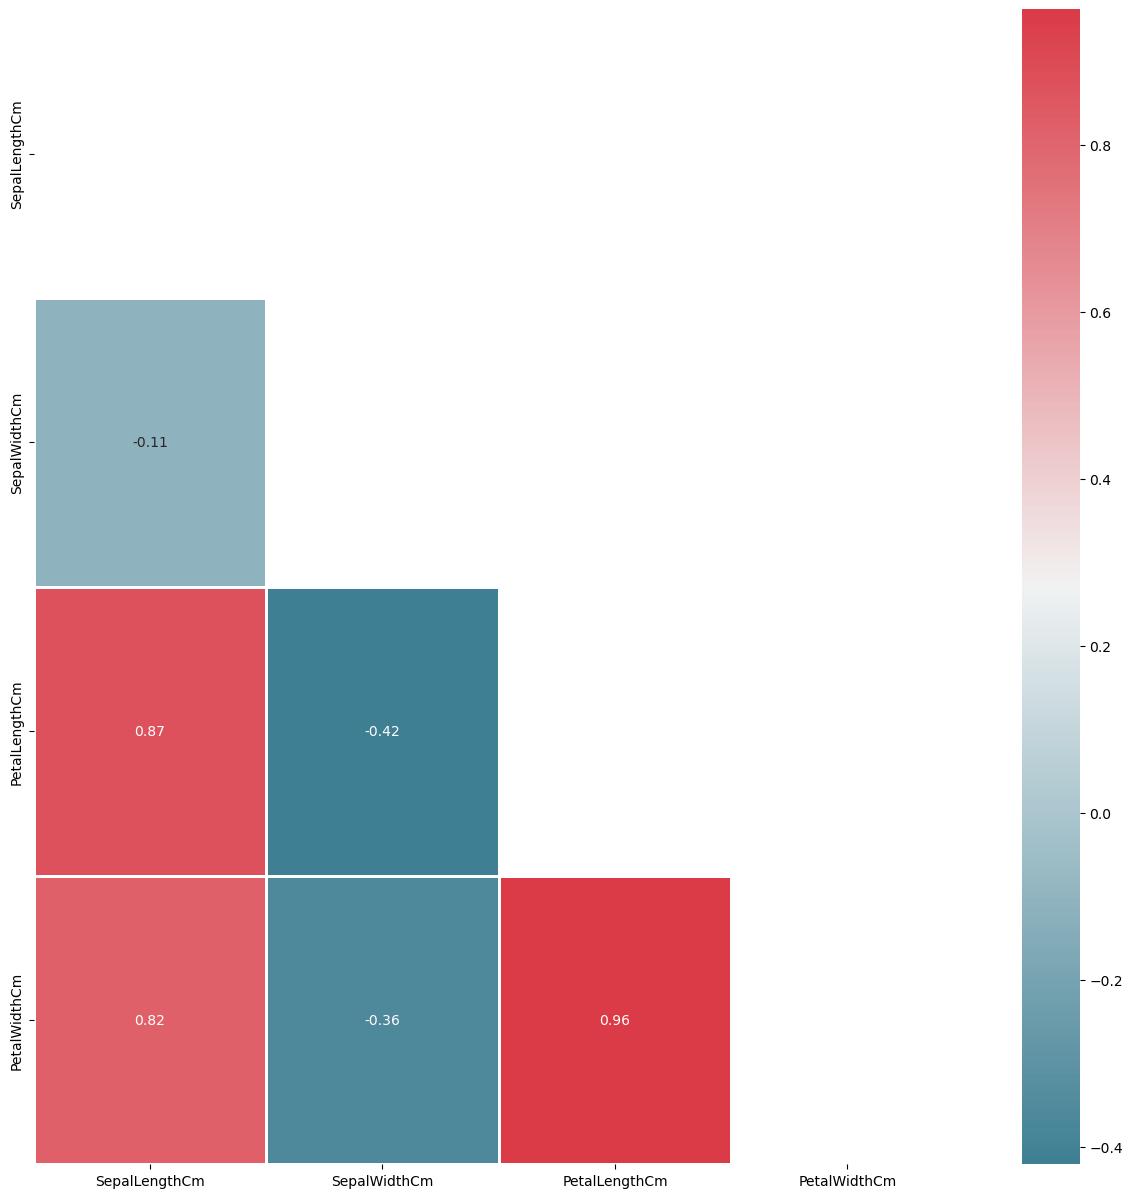

In [3]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In [4]:
# drop rows with missing values
df = df.dropna()

# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df

,0,1,2
Species,,,
Iris-setosa,-2.264542,0.505704,-0.121943
Iris-setosa,-2.086426,-0.655405,-0.227251
Iris-setosa,-2.367950,-0.318477,0.051480
Iris-setosa,-2.304197,-0.575368,0.098860
Iris-setosa,-2.388777,0.674767,0.021428
...,...,...,...
Iris-virginica,1.870522,0.382822,0.254532
Iris-virginica,1.558492,-0.905314,-0.025382
Iris-virginica,1.520845,0.266795,0.179277


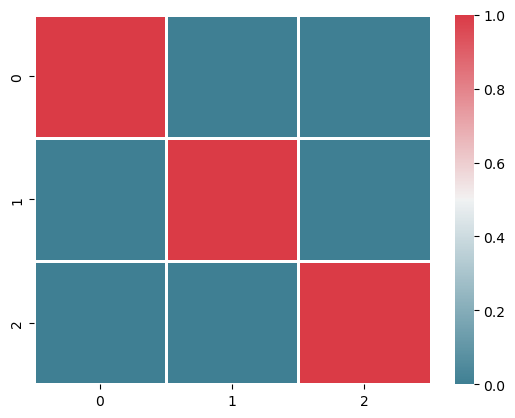

In [5]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

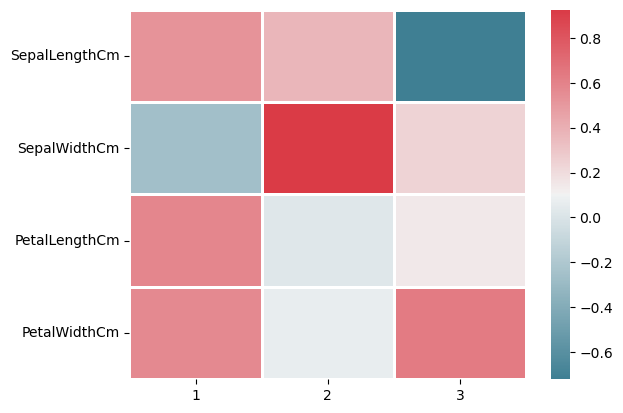

In [6]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()